In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
def interpolate_sawtooth(t, num_repeats=1):
    # Define the points for the modified sawtooth trajectory
    points = [
        (0, 0), (0, 0.4), (0.4, -0.4), (0.4, 0.4), (0.4, -0.4),
        (0, 0.4), (0, -0.4), (-0.4, 0.4), (-0.4, -0.4), 
        (-0.4, 0.4), (0, -0.4), (0, 0)
    ]

    # traj_time = traj_time  # Total time for the trajectory
    N = num_repeats  # Number of repetitions

    # Adjust the total trajectory time to account for N repetitions
    T_total = traj_time / N  # Total time for one repetition of the trajectory

    # Define the segment time
    T_seg = T_total / (len(points) - 1)  # Segment time based on the number of points
    
    # Calculate the time within the current cycle
    cycle_time = t % ((len(points) - 1) * T_seg)
    
    # Determine which segment we're in
    segment = int(cycle_time // T_seg)
    
    # Time within the current segment
    local_time = cycle_time % T_seg
    
    # Select the start and end points of the current segment
    start_point = points[segment]
    end_point = points[(segment + 1) % len(points)]
    
    # Linear interpolation for the current segment
    x = start_point[0] + (end_point[0] - start_point[0]) * (local_time / T_seg)
    y = start_point[1] + (end_point[1] - start_point[1]) * (local_time / T_seg)
    
    return x, y


In [6]:
N = 1  # Number of repetitions
traj_time = 40  # Total time for the trajectory

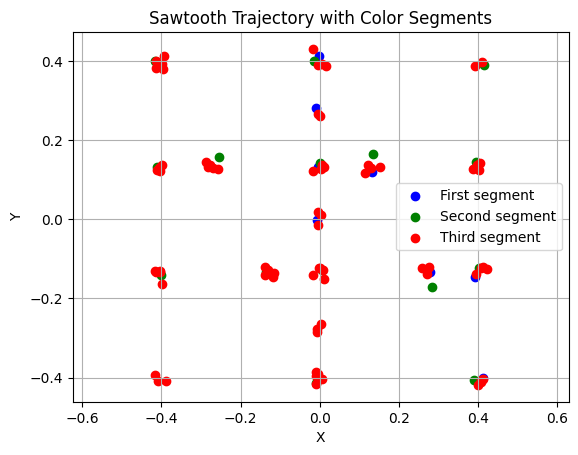

In [12]:
# Example usage:
# Sampling the trajectory at different times
times = np.linspace(0, 3*traj_time/2, num=100)  # 100 sample points
trajectory = [interpolate_sawtooth(t, 2) for t in times]

# Extract x and y values
x_vals, y_vals = zip(*trajectory)
noise_x = np.random.normal(0, 0.01, len(x_vals))
noise_y = np.random.normal(0, 0.01, len(x_vals))
x_vals+=noise_x
y_vals+=noise_y


# Function to find the closest index to a given target point
def find_closest_point(target_x, target_y, trajectory):
    return min(range(len(trajectory)), key=lambda i: (trajectory[i][0] - target_x)**2 + (trajectory[i][1] - target_y)**2)

# Find indices of the closest points to (0.4, 0.4) and (-0.4, -0.4)
index_0_4_0_4 = find_closest_point(0.4, 0.4, trajectory)
index_minus_0_4_minus_0_4 = find_closest_point(-0.4, -0.4, trajectory)


# Plot the segments with different colors
plt.scatter(x_vals[0:index_0_4_0_4], y_vals[0:index_0_4_0_4], color='blue', marker='o', label="First segment")
plt.scatter(x_vals[index_0_4_0_4:index_minus_0_4_minus_0_4], y_vals[index_0_4_0_4:index_minus_0_4_minus_0_4], color='green', marker='o', label="Second segment")
plt.scatter(x_vals[index_minus_0_4_minus_0_4:], y_vals[index_minus_0_4_minus_0_4:], color='red', marker='o', label="Third segment")

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sawtooth Trajectory with Color Segments')
plt.axis('equal')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
